In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import datetime

## Objective
Look at the Customer Data of a Food delivery company & draw insights from the data. 
Identify the key drivers for customer behaviour and mention differentiating observations for each segment


In [2]:
from kmodes.kmodes import KModes

### laoding data

In [3]:
df = pd.read_csv('food_delivery_data.csv')
print (df.shape)
df.head()

(10000, 11)


,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,6/29/15 10:57,12/10/15 2:18,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,7/4/15 15:39,12/15/15 14:42,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,6/26/15 9:56,12/9/15 20:45,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,7/1/15 1:51,12/14/15 1:43,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,7/11/15 18:34,12/19/15 23:26,182,4.0,23.0,85150,1738,9958,2.4,36


In [4]:
df.columns

Index(['customer_id', 'First Time', 'Recent Time', '# of Orders',
       '# of Orders in last 7 days', '# of Orders in last 4 weeks', 'Amount',
       'Amount in last 7 days', 'Amount in last 4 weeks',
       'Avg_DistanceFromResturant', 'Avg_DeliveryTime'],
      dtype='object')

### data understanding

In [5]:
## num of customers
print (df.customer_id.nunique())

10000


In [6]:
df.describe()
#Observations: 
# Amount in last 7 days,Amount in last 4 weeks have missing values (as min=0), 
# Avg_DistanceFromResturant is negative in few cases

,customer_id,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
count,1.000000e+04,10000.000000,1923.000000,4341.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,6.714023e+05,7.006200,1.734789,3.197650,2253.273600,109.497500,455.491200,2.35620,36.914300
std,3.901880e+05,13.118619,1.369875,3.940818,5136.484499,397.055277,1237.872749,0.97492,13.175413
min,2.800000e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-0.80000,15.000000
25%,3.365148e+05,1.000000,1.000000,1.000000,279.000000,0.000000,0.000000,1.70000,26.000000
50%,6.683395e+05,2.000000,1.000000,2.000000,688.000000,0.000000,0.000000,2.40000,36.500000
75%,1.005002e+06,7.000000,2.000000,4.000000,2040.000000,0.000000,398.000000,3.02500,47.000000
max,1.355445e+06,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.90000,83.000000


In [7]:
df.dtypes
# convert dates to date format 

customer_id                      int64
First Time                      object
Recent Time                     object
# of Orders                      int64
# of Orders in last 7 days     float64
# of Orders in last 4 weeks    float64
Amount                           int64
Amount in last 7 days            int64
Amount in last 4 weeks           int64
Avg_DistanceFromResturant      float64
Avg_DeliveryTime                 int64
dtype: object

In [8]:
# format date
df['First_Order_Time'] = pd.to_datetime(df['First Time'])
df['Recent_Order_Time'] = pd.to_datetime(df['Recent Time'])

df['First_Order_Time'] = df['First_Order_Time'].dt.strftime('%m/%d/%Y')
df['Recent_Order_Time'] = df['Recent_Order_Time'].dt.strftime('%m/%d/%Y')

df['First_Order_Time'] = pd.to_datetime(df['First_Order_Time'])
df['Recent_Order_Time'] = pd.to_datetime(df['Recent_Order_Time'])

In [9]:
df.head()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,First_Order_Time,Recent_Order_Time
0,1269647,6/29/15 10:57,12/10/15 2:18,212,6.0,43.0,138808,4291,26853,1.6,51,2015-06-29,2015-12-10
1,167631,7/4/15 15:39,12/15/15 14:42,211,8.0,19.0,56404,1925,4177,2.2,42,2015-07-04,2015-12-15
2,301524,6/26/15 9:56,12/9/15 20:45,189,9.0,33.0,36020,1772,6404,2.5,57,2015-06-26,2015-12-09
3,1268254,7/1/15 1:51,12/14/15 1:43,184,6.0,37.0,32489,975,7110,3.1,55,2015-07-01,2015-12-14
4,357161,7/11/15 18:34,12/19/15 23:26,182,4.0,23.0,85150,1738,9958,2.4,36,2015-07-11,2015-12-19


In [10]:
# drop redundant columns
df.drop(['First Time','Recent Time'], axis = 1, inplace=True)

# assume current date to be just the next day after latest transaction
df['current_date'] = max(df['Recent_Order_Time'])+ datetime.timedelta(days=1)

In [11]:
# max(df['Recent_Order_Time'])+ datetime.timedelta(days=1)

In [12]:
# extract num_days_since_last_order, num_days_since_first_order
df['num_days_since_last_order'] = df['current_date'] - df['Recent_Order_Time']
df['num_days_since_first_order'] = df['current_date'] - df['First_Order_Time']

In [13]:
## rename columns

df.columns = ['customer_id', 'num_of_Orders', 'num_of_Orders_in_last_7_days',
       'num_of_Orders_in_last_4_weeks', 'Amount', 'Amount_in_last_7_days',
       'Amount_in_last_4_weeks', 'Avg_DistanceFromResturant',
       'Avg_DeliveryTime', 'First_Order_Time', 'Recent_Order_Time',
       'current_date', 'num_days_since_last_order',
       'num_days_since_first_order']

In [14]:
df.head(2)

,customer_id,num_of_Orders,num_of_Orders_in_last_7_days,num_of_Orders_in_last_4_weeks,Amount,Amount_in_last_7_days,Amount_in_last_4_weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,First_Order_Time,Recent_Order_Time,current_date,num_days_since_last_order,num_days_since_first_order
0,1269647,212,6.0,43.0,138808,4291,26853,1.6,51,2015-06-29,2015-12-10,2016-01-14,35 days,199 days
1,167631,211,8.0,19.0,56404,1925,4177,2.2,42,2015-07-04,2015-12-15,2016-01-14,30 days,194 days


In [15]:
# check for cases where order value is null for last 7 days and 4 Weeks
null_orders_in_last_7_days = df[df.num_of_Orders_in_last_7_days.isna()]
null_orders_in_last_4_weeks = df[df.num_of_Orders_in_last_4_weeks.isna()]

print (null_orders_in_last_7_days.num_days_since_last_order.min())
print (null_orders_in_last_4_weeks.num_days_since_last_order.min())
# it means it these are actually null not missing  so replace them by 0

df.num_of_Orders_in_last_7_days.fillna(0, inplace = True)
df.num_of_Orders_in_last_4_weeks.fillna(0, inplace = True)

9 days 00:00:00
30 days 00:00:00


In [16]:
# replace neagtive values with 0
df['Avg_DistanceFromResturant'] = np.where(df['Avg_DistanceFromResturant']<0, 0,df['Avg_DistanceFromResturant'])

In [17]:
# check
df.describe()

,customer_id,num_of_Orders,num_of_Orders_in_last_7_days,num_of_Orders_in_last_4_weeks,Amount,Amount_in_last_7_days,Amount_in_last_4_weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,num_days_since_last_order,num_days_since_first_order
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000
mean,6.714023e+05,7.006200,0.333600,1.388100,2253.273600,109.497500,455.491200,2.357210,36.914300,80 days 09:37:35.040000,130 days 14:04:50.880000
std,3.901880e+05,13.118619,0.910052,3.041842,5136.484499,397.055277,1237.872749,0.972274,13.175413,48 days 13:04:08.533869,52 days 08:45:35.890623
min,2.800000e+01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,1 days 00:00:00,7 days 00:00:00
25%,3.365148e+05,1.000000,0.000000,0.000000,279.000000,0.000000,0.000000,1.700000,26.000000,41 days 00:00:00,87 days 00:00:00
50%,6.683395e+05,2.000000,0.000000,0.000000,688.000000,0.000000,0.000000,2.400000,36.500000,67 days 00:00:00,139 days 00:00:00
75%,1.005002e+06,7.000000,0.000000,1.000000,2040.000000,0.000000,398.000000,3.025000,47.000000,113 days 00:00:00,177 days 00:00:00
max,1.355445e+06,212.000000,14.000000,46.000000,138808.000000,10150.000000,26853.000000,5.900000,83.000000,220 days 00:00:00,223 days 00:00:00


In [18]:
# avg of one order for a customer
df['AOV'] = round(df['Amount']/df['num_of_Orders'],0)

# avg of one order for a customer in last 7 days
df['AOV_last_7_days'] = np.where(df['num_of_Orders_in_last_7_days']==0, 0,
                                 round(df['Amount_in_last_7_days']/df['num_of_Orders_in_last_7_days'],0))

# avg of one order for a customer in last 4 weeks
df['AOV_last_4_weeks'] = np.where(df['num_of_Orders_in_last_4_weeks']==0, 0,
                                  round(df['Amount_in_last_4_weeks']/df['num_of_Orders_in_last_4_weeks'],0))

In [19]:
# % of users transacted in last 7 days
print (df[df['num_of_Orders_in_last_7_days']!=0].shape[0]/df.shape[0])

# % of users transacted in last 4 weeks 
print (df[df['num_of_Orders_in_last_4_weeks']!=0].shape[0]/df.shape[0])

0.1923
0.4341


In [20]:
# filtering for only relevant columns

In [21]:
df_mod = df[['customer_id','num_of_Orders', 'AOV','AOV_last_7_days','AOV_last_4_weeks', 'Avg_DistanceFromResturant', 'Avg_DeliveryTime', 'num_days_since_last_order', 'num_days_since_first_order']]

In [22]:
# extract days
df_mod['num_days_since_last_order'] = df_mod['num_days_since_last_order'].dt.days
df_mod['num_days_since_last_order'] = df_mod['num_days_since_last_order'].astype(int)

df_mod['num_days_since_first_order'] = df_mod['num_days_since_first_order'].dt.days
df_mod['num_days_since_first_order'] = df_mod['num_days_since_first_order'].astype(int)

C:\Users\ankar.yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ankar.yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ankar.yadav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to

In [23]:
df_mod.head()

,customer_id,num_of_Orders,AOV,AOV_last_7_days,AOV_last_4_weeks,Avg_DistanceFromResturant,Avg_DeliveryTime,num_days_since_last_order,num_days_since_first_order
0,1269647,212,655.0,715.0,624.0,1.6,51,35,199
1,167631,211,267.0,241.0,220.0,2.2,42,30,194
2,301524,189,191.0,197.0,194.0,2.5,57,36,202
3,1268254,184,177.0,162.0,192.0,3.1,55,31,197
4,357161,182,468.0,434.0,433.0,2.4,36,26,187


In [24]:
# l2-normalize  
X_normalized = preprocessing.normalize(df_mod[df_mod.columns[1:]], norm='l2')

In [26]:
for i in range(7):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X_normalized)
    print (i,"explained variance : ",sum(pca.explained_variance_.round(2)), "|","explained variance ratio : ",sum(pca.explained_variance_ratio_.round(2)))
    print ('')

0 explained variance :  0 | explained variance ratio :  0

1 explained variance :  0.14 | explained variance ratio :  0.48

2 explained variance :  0.24000000000000002 | explained variance ratio :  0.8200000000000001

3 explained variance :  0.27 | explained variance ratio :  0.92

4 explained variance :  0.28 | explained variance ratio :  0.9600000000000001

5 explained variance :  0.28 | explained variance ratio :  0.9800000000000001

6 explained variance :  0.28 | explained variance ratio :  1.0



In [27]:
pca = PCA(n_components = 4)
pca_result = pca.fit_transform(X_normalized)

In [28]:
distortions = []
silhouette_avg_list = []
labels_temp = [2,3,4,5]
for k in labels_temp:
    kmeanModel = KMeans(n_clusters=k,random_state=100)
    kmeanModel.fit(pca_result)
    cluster_labels = kmeanModel.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    distortions.append(kmeanModel.inertia_)
    silhouette_avg_list.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4446735361328791
For n_clusters = 3 The average silhouette_score is : 0.5108056024419483
For n_clusters = 4 The average silhouette_score is : 0.5451501041056889
For n_clusters = 5 The average silhouette_score is : 0.491573307009901


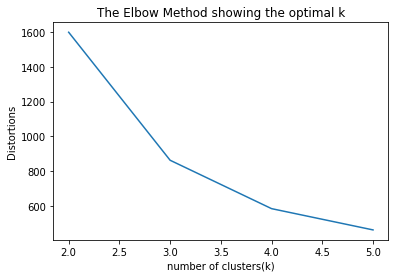

In [29]:
# plotting elbow curve for optimal k value (inertia vs no. of clusters)
plt.plot(labels_temp, distortions)
plt.xlabel('number of clusters(k)')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
'''Make Clusters'''

cluster_size = 4
k = int(cluster_size)
kmeans = KMeans(n_clusters=k, random_state=100).fit(pca_result)
cluster_labels = list(kmeans.predict(pca_result))

cluster distribution


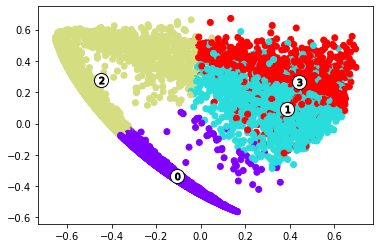

In [31]:
print ("cluster distribution")
projected = pca.fit_transform(X_normalized.data)

plt.scatter(projected[:, 0], projected[:, 1],c=list(kmeans.labels_), cmap = 'rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
